(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


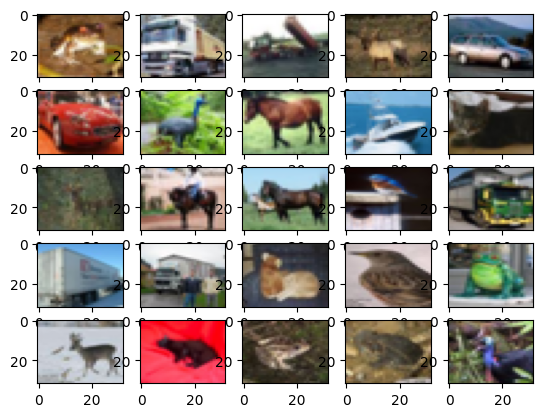

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.4689 - loss: 0.6516 - val_accuracy: 0.5922 - val_loss: 0.6112
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.6018 - loss: 0.6058 - val_accuracy: 0.6296 - val_loss: 0.5988
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.6432 - loss: 0.5964 - val_accuracy: 0.6655 - val_loss: 0.5923
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.6600 - loss: 0.5908 - val_accuracy: 0.6795 - val_loss: 0.5889
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.6730 - loss: 0.5875 - val_accuracy: 0.6816 - val_loss: 0.5866

LSTM Autoencoder Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 32, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         115,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 32, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 32, 96)              │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 32, 32, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 777,506 (2.97 MB)

 Trainable params: 259,168 (1012.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 518,338 (1.98 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


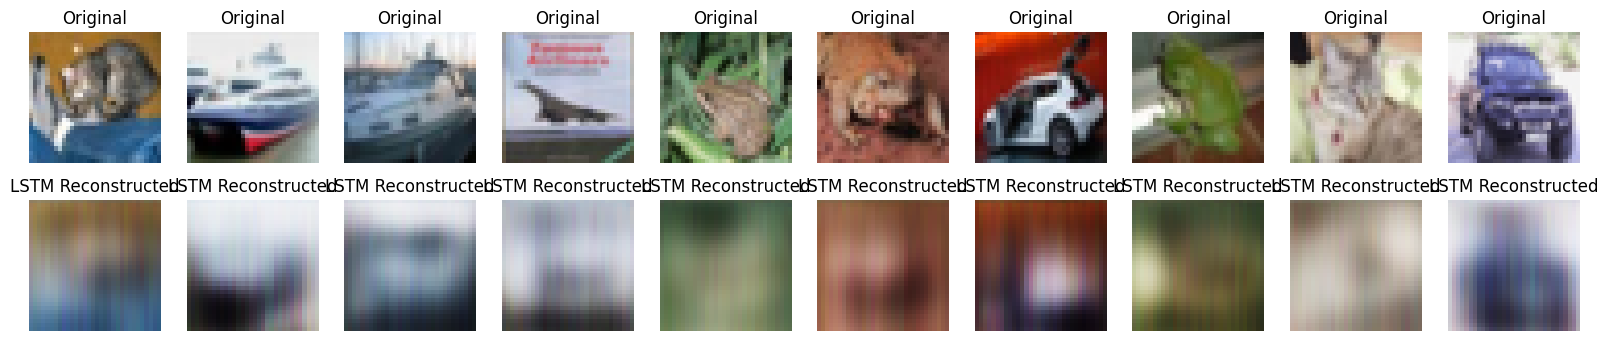

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Reshape, SimpleRNN, LSTM, TimeDistributed, RepeatVector
#from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer
cifar10 = tf.keras.datasets.cifar10


# Load the cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Check the shape
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0 

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

# Reshape input data from (32, 32, 3) to (32, 96) for the LSTM
x_train_reshaped = x_train.reshape((x_train.shape[0], 32, 32 * 3))  # (batch_size, timesteps, features)
x_test_reshaped = x_test.reshape((x_test.shape[0], 32, 32 * 3))

# LSTM autoencoder model
lstm_autoencoder = Sequential([
    InputLayer(input_shape=(32, 32, 3)),  # Input shape is (32, 32, 3)
    Reshape((32, 32 * 3)),  # Reshape to (32, 96) for LSTM
    # Encoder
    LSTM(128, activation='relu', input_shape=(32, 32), return_sequences=False),
    RepeatVector(32),
    # Decoder
    LSTM(128, activation='relu', return_sequences=True), 
    # Update size of the output to match (32, 96)
    TimeDistributed(Dense(32 * 3, activation='sigmoid')),
    Reshape((32, 32, 3))  # Reshape back to original image size (32, 32, 3)
])

lstm_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model with the reshaped input
lstm_history = lstm_autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, validation_split=0.2)



print("\nLSTM Autoencoder Summary:")
lstm_autoencoder.summary()


# Reconstruct images using the LSTM autoencoder
lstm_reconstructed = lstm_autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # number of images to display

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display LSTM reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(lstm_reconstructed[i].reshape(32, 32,3))
    plt.title("LSTM Reconstructed")
    plt.axis('off')

plt.show()


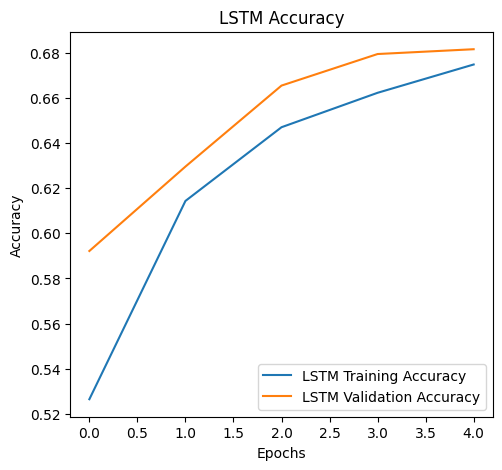

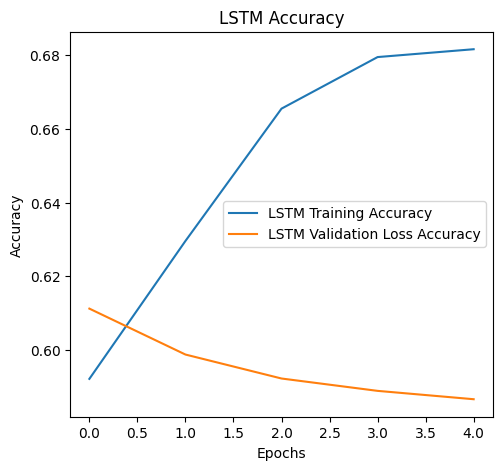

In [5]:
# Plot the training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()